# 欠損値データ

In [ ]:
"""
欠損データの３つの発生メカニズム

・Missing completely At Random (MCAR)
・Missing At Random:MAR (MAR)
・Missing Not At Random (MNAR)

解析における分類
・無視可能 => MCAR, MAR
・無視不可能 => MNAR

"""

In [ ]:
"""
処理方法

・削除する
　リストワイズ法
　ペアワイズ法
-> 欠損データ量、発生原因を考慮する必要がある


・補完する

単一代入法
　平均値代入法
　比例代入法
　回帰代入法
　確率的回帰代入法
　ホットデック法

多重代入法
　EMアルゴリズムによる補完
　マルコフ連鎖モンテカルロ法
 
 
・そのまま使用する
　完全情報最尤推定法
 

"""

## 欠損値の確認方法

In [1]:
import pandas as pd 

user_table = pd.read_csv('csv/user_table.csv')

missing_table = pd.DataFrame()
for col in user_table.columns:
    missing_table[col] = [user_table[user_table[col].isnull()].shape[0]]

In [2]:
missing_table

,user_id,name,nickname,age,country,num_family,married,job,income,profile
0,0,0,0,5131,10148,2570,2456,0,2527,0


In [4]:
#これでも簡単に表示できる
pd.DataFrame(user_table.isnull().sum()).T

,user_id,name,nickname,age,country,num_family,married,job,income,profile
0,0,0,0,5131,10148,2570,2456,0,2527,0


## リストワイズ法

In [21]:
user_table_drop = user_table.copy()

user_table_drop = user_table.dropna()

rows = []
rows_drop = []

for col in user_table_drop:
    rows.append(user_table[col].count())
    rows_drop.append(user_table_drop[col].count()) 

df = pd.DataFrame()
df['項目名'] = user_table.columns
df['削除前件数'] = rows
df['削除後件数'] = rows_drop

#削除数もあった方が良いと思い作成（自分で実装）
df['削除数'] = [ rows[i] - rows_drop[1] for i in range(len(rows))]
df


,項目名,削除前件数,削除後件数,削除数
0,user_id,50103,30714,19389
1,name,50103,30714,19389
2,nickname,50103,30714,19389
3,age,44972,30714,14258
4,country,39955,30714,9241
5,num_family,47533,30714,16819
6,married,47647,30714,16933
7,job,50103,30714,19389
8,income,47576,30714,16862
9,profile,50103,30714,19389


## ペアワイズ削除法

In [59]:
drop_list = pd.DataFrame(user_table.isnull().sum())

#欠損値数　top2を抽出 -> [age, country]
top_2_feature = drop_list.sort_values(by=0, ascending=False).index[0:2]

#欠損数top2の列を削除
drop_df = user_table.drop(top_2_feature, axis=1)
user_table_drop = drop_df.copy()
user_table_drop = user_table_drop.dropna()


df = pd.DataFrame()
df['項目名'] = drop_df.columns
rows = []
rows_drop = []

for col in user_table_drop:
    rows.append(user_table[col].count())
    rows_drop.append(user_table_drop[col].count()) 

df = pd.DataFrame()
df['項目名'] = user_table_drop.columns
df['削除前件数'] = rows
df['削除後件数'] = rows_drop
df

,項目名,削除前件数,削除後件数
0,user_id,50103,42940
1,name,50103,42940
2,nickname,50103,42940
3,num_family,47533,42940
4,married,47647,42940
5,job,50103,42940
6,income,47576,42940
7,profile,50103,42940


483.63813687573565


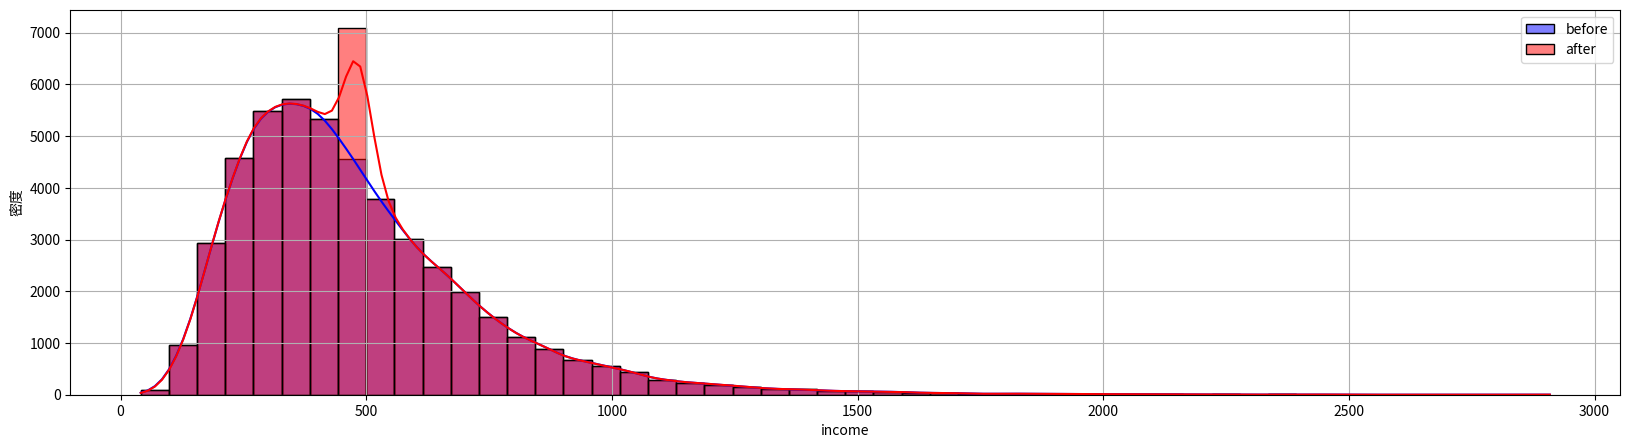

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
rcParams['font.family'] = 'Noto Sans JP'

fig,ax = plt.subplots(1,1, figsize=(20,5))

# plt.rcParams['font.sans-serif'] 

#代入前
sns.histplot(user_table['income'], label='before', kde=True, bins=50, color='b')

#代入後
user_table_fillna = user_table.copy()

#平均値代入法
user_table_fillna['income'] = user_table['income'].fillna(user_table['income'].mean())
sns.histplot(user_table_fillna['income'], label='after', kde=True, bins=50, color='r')

ax.set_ylabel('密度')
ax.legend()
plt.grid()

print(user_table['income'].mean())

"""
incomeの欠損値は2527件（全体の5%）あり、全てを平均で補完したため、平均値の数が突出してしまっている。
->欠損の背景を知る必要がある。
->それから欠損値の適切な処理を実施する

"""

# クラスタリング

In [ ]:
"""
活用の場
・ECサイトの顧客分析
・機械学習を取り入れたAIシステムの構築
　→特徴量の生成

クラスタリングは2つの手法に分けられる
・階層的クラスター分析
・非階層的クラスター分析
　→ビジネスではこっちが使われる

"""

## 階層クラスタリング

In [ ]:
"""
クラスター同士の類似度を測る方法
・重心法
・最短（最長）距離法
・群平均法
"""

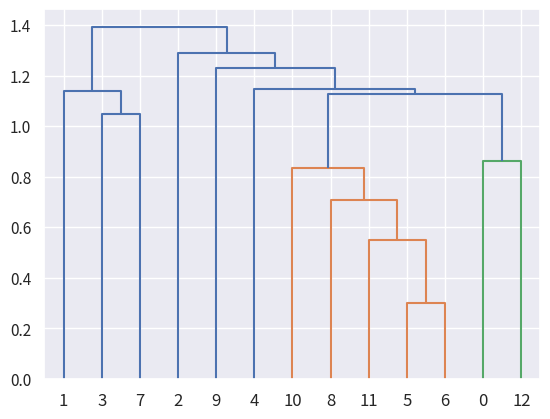

<Figure size 2000x500 with 0 Axes>

,項目名
0,alcohol
1,malic_acid
2,ash
3,alcalinity_of_ash
4,magnesium
5,total_phenols
6,flavanoids
7,nonflavanoid_phenols
8,proanthocyanins
9,color_intensity


In [298]:
from scipy.cluster.hierarchy import linkage,dendrogram

"""
デンドログラムは階層的クラスタリングを示す。
階層的クラスタリングはクラスタリングの過程を木で表す。

【疑問】
各特徴量間の関連性を見たいから、相関行列をlinkage()しているのか？
->Yes

"""
def plot_dendrograme(df):
    
    #linkage:階層的クラスタリング -> dengrogram：階層の可視化
    li = linkage(df.corr())
    r = dendrogram(li, labels=df.columns)
    plt.figure(figsize=[20,5])
    plt.show()


from sklearn import datasets
X, y = datasets.load_wine(return_X_y=True, as_frame=True)
wine_data = X.copy()
dframe = pd.DataFrame()
dframe['項目名'] = wine_data.columns

number_list = list(range(0, 13))
wine_data.columns = number_list
plot_dendrograme(wine_data)
pd.DataFrame(dframe)

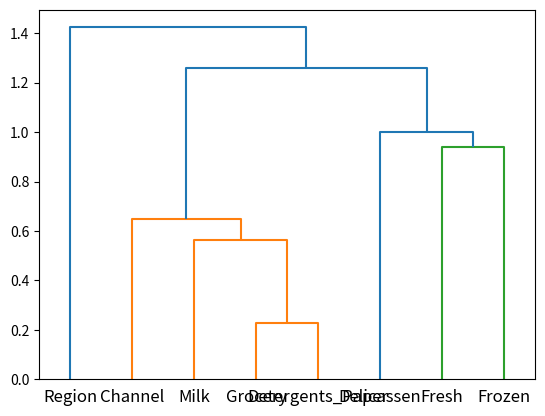

<Figure size 2000x500 with 0 Axes>

In [129]:
df_sale = pd.read_csv('csv/Wholesale customers data.csv')
plot_dendrograme(df_sale)

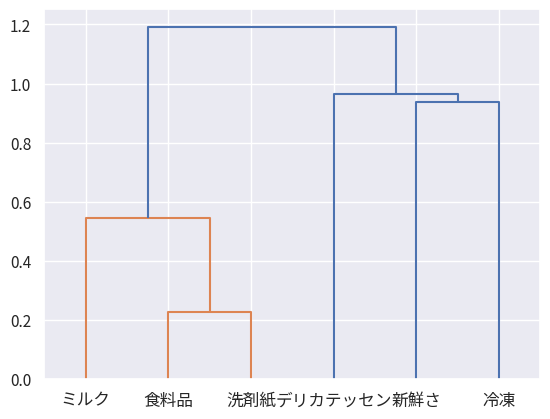

<Figure size 2000x500 with 0 Axes>

In [205]:
wholesale_drop = df_sale.drop(['Channel', 'Region'], axis=1)


wholesale_drop.columns = ['新鮮さ', 'ミルク', '食料品', '冷凍', '洗剤紙', 'デリカテッセン']
plot_dendrograme(wholesale_drop)

## 非階層クラスタリング

In [ ]:
"""
k-means法
クラスター内では分散が小さく、クラスター間では分散が大きくなるように分割

メリット：
・階層クラスタリングに比べてデータ間の距離を計算する必要がないため、処理が早い

デメリット：
・最初の重心がランダムなため、同じ母集団でも計算する度に分類結果が少し変わることがある
・外れ値の影響で正しく分類できないことがある
・複雑なデータや、特定の方向に分散したデータをうまく分類できないことがある

<クラスタリングの注意点>
・分析の前に分析の目的、仮説を明確にする
　→これがないと分類だけに終始してしまい、それ以上の考察が得られない
　→どのようなセグメント分けになるのか
　→セグメント分けの結果を何に役立てるのか
・スケールが異なる特徴量を持つデータは標準化をする　→ ユークリッド距離に影響

"""

In [ ]:
"""
目的

データセット（１）：ワインの品質データ
ワインの品質（レベル感）を把握し、改善が必要なグループを検出すること。

データセット（２）：卸売業者の顧客（取引）データ
取引情報から顧客の属性を把握し、アプローチするターゲット層を見つけること。

"""

In [299]:
#データセット（１）：ワインの品質データ

wine =datasets.load_wine()
wine_df = pd.DataFrame(wine.data, columns=wine.feature_names)


name_list = ['アルコール','リンゴ酸','灰','アルカリ性の灰','マグネシウム','トータルフェノール','フラボノイド','非フラボノイドフェノール','プロアントシアニン','色の強度','色相','希釈値','プロリン']
wine_df.columns = name_list
wine_df.head()

,アルコール,リンゴ酸,灰,アルカリ性の灰,マグネシウム,トータルフェノール,フラボノイド,非フラボノイドフェノール,プロアントシアニン,色の強度,色相,希釈値,プロリン
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [230]:
# データ取得②（卸売りの顧客データ）
wholesale_customers = pd.read_csv("csv/Wholesale customers data.csv")

# データ概要
wholesale_customers.columns = ['チャネル','地域', '新鮮さ', 'ミルク', '食料品', '冷凍', '洗剤紙', 'デリカテッセン']
wholesale_customers.head()


,チャネル,地域,新鮮さ,ミルク,食料品,冷凍,洗剤紙,デリカテッセン
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [176]:
#クラスタリング
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

def clustering(df, num):
    
    #標準化
    sc = StandardScaler()
    data_norm = sc.fit_transform(df)
    
    #必要なし
    # data_norm = sc.transform(df)
    
    #分類器
    cls = KMeans(n_clusters=num, n_init='auto')
    result = cls.fit(data_norm)
    pred = cls.fit_predict(data_norm)
    
    plt.figure(figsize=[10, 5])
    #プロット様式の変更
    sns.set(rc = {'axes.facecolor':'cornflowerblue', 'figure.facecolor':'cornflowerblue'})
    sns.scatterplot(x=data_norm[:, 0], y=data_norm[:, 1], c=result.labels_)
    plt.scatter(result.cluster_centers_[:, 0], result.cluster_centers_[:, 1], s=250, marker='*', c='b')
    plt.grid('darkgray')
    plt.show()

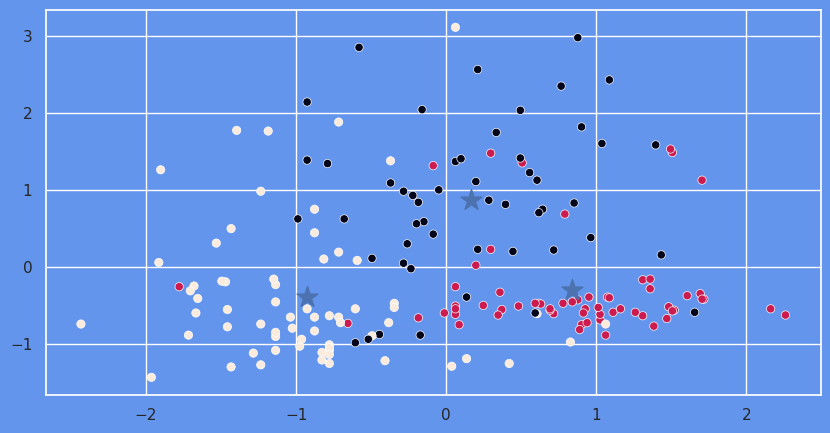

In [177]:
# ワインデータ
clustering(wine_data, 3)

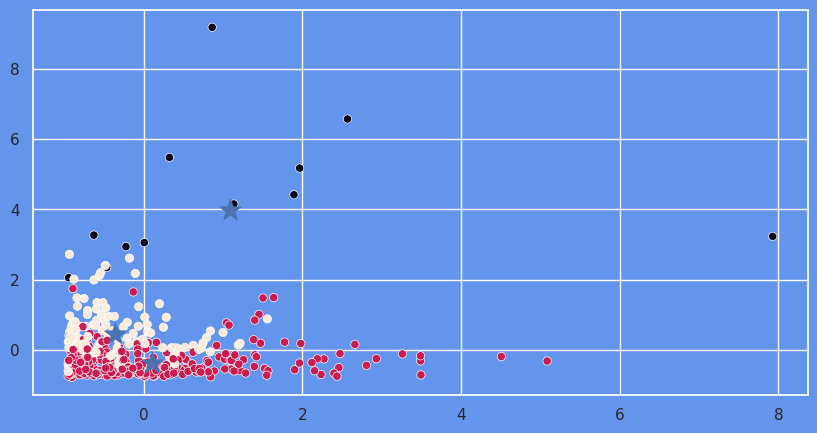

'\n外れ値の除去をしていないので、データの拡散が見られる。\n分類は厳しい\n'

In [233]:
# 顧客（取引）データは、取引商品情報以外の項目を除外
wholesale_drop = wholesale_customers.copy()
wholesale_drop = wholesale_drop.drop(columns=['チャネル', '地域'])
clustering(wholesale_drop, 3)

"""
外れ値の除去をしていないので、データの拡散が見られる。
分類は厳しい
"""

## エルボー法

In [ ]:
"""
上記では顧客データでクラスター数の判断が難しい
エルボー法で最適なクラスター数を探索する。
X軸：クラスター数
Y軸：SSE（クラス内誤差平方和） → データと属しているクラスタ中心点との距離(ユークリッド距離)

"""

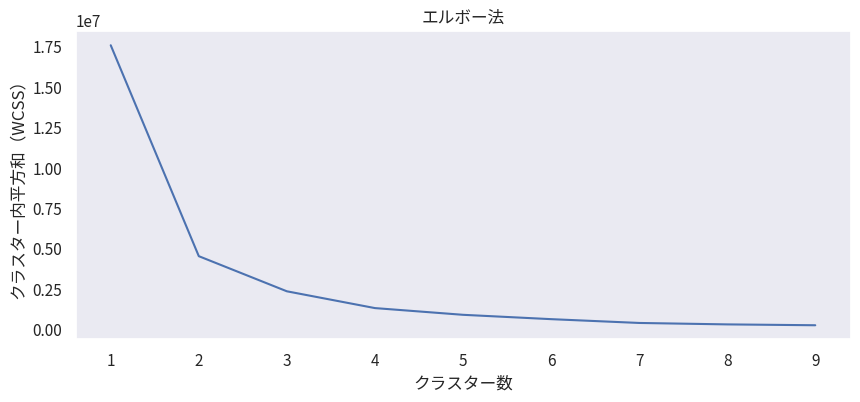

In [213]:
def elbow(df):
    wcss = []
    
    for i in range(1, 10):
        
        #'k-means++'はランダムより良い結果、max_iterはセントロイドの中心計算回数、n_initは30回の試行
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init = 30, random_state=0)
        kmeans.fit(df)
        
        #fit後のkmeansのクラスタ内誤差平方和を格納
        #.score(df)でも同じ結果になる
        wcss.append(kmeans.inertia_)
        # wcss.append(-kmeans.score(df))
        
        
        
    plt.figure(figsize=[10,4])
    plt.plot(range(1,10), wcss)
    plt.title('エルボー法')
    plt.xlabel('クラスター数')
    plt.ylabel('クラスター内平方和（WCSS）')
    plt.grid()
    plt.show()

sns.set()
rcParams['font.family'] = 'Noto Sans JP'
elbow(wine_df)

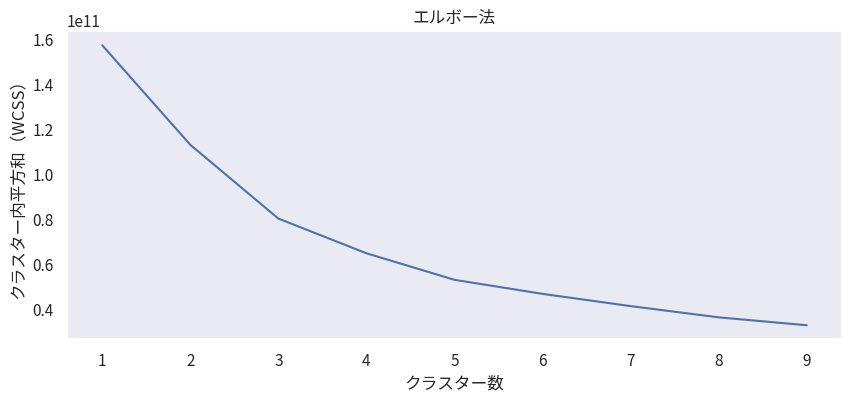

In [214]:
#顧客データ
elbow(wholesale_drop)

## クラスタリング＋主成分分析

寄与率は[0.36198848 0.1920749  0.11123631]
[0.36198848 0.55406338 0.66529969]


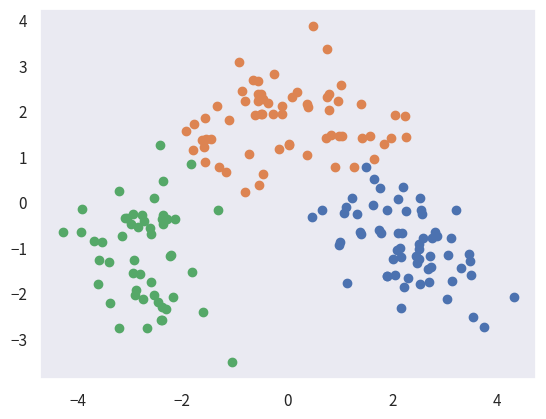

In [196]:
import numpy as np
from sklearn.decomposition import PCA

def cross(df, num):
    """
    1.データの標準化
    2.KMeansで各データのラベル付
    3.主成分分析で次元圧縮後,2のラベル列追加
    
    """
    
    
    df_cls = df.copy()
    
    
    #標準化
    sc = StandardScaler()
    clustering_sc = sc.fit_transform(df_cls)
    
    #k-means法
    kmeans = KMeans(n_clusters=num, random_state=42, n_init='auto')
    clusters = kmeans.fit(clustering_sc)
    
    #各データに対するクラスタリングのラベルを追加
    df_cls['cluster'] = clusters.labels_
    
    
    #---------------
    #主成分分析
    x = clustering_sc
    
    #KMeansのクラスター数と同じ数の特徴量に次元削減？？？
    pca = PCA(n_components=num)
    x_pca = pca.fit_transform(x)
    pca_df = pd.DataFrame(x_pca)
    
    #次元削減されたデータセットにKMeansでラベルされた列を追加
    pca_df['cluster'] = df_cls['cluster']
    
    #各成分の寄与率
    print('寄与率は{}'.format(pca.explained_variance_ratio_))
    print(np.cumsum(pca.explained_variance_ratio_))
    
    for i in df_cls['cluster'].unique():
        tmp = pca_df.loc[pca_df['cluster'] == i]
        plt.scatter(tmp[0], tmp[1])
    
    plt.grid()
    plt.show()

cross(wine_df, 3)
    

"""
寄与率の合計が0.67なので、3つの主成分が元のデータの分散の67%を説明している。
残りの33%は他の主成分（元のデータセットの残りの特徴量？）

"""

寄与率は[0.38750123 0.22374588 0.12647173 0.09229904]
[0.38750123 0.61124711 0.73771884 0.83001788]


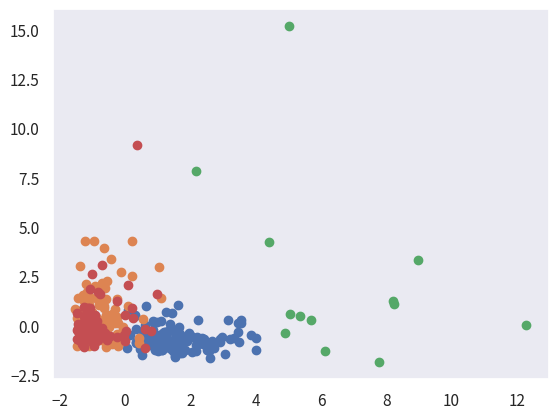

In [202]:
# 顧客（取引）データ
# クラスター数を４に設定して、再度クラスタリングを実施
cross(wholesale_customers, 4)

"""
外れ値がクラスターと認識されて、データも重なりが多く、綺麗に分類されてない
"""

寄与率は[0.44082893 0.283764   0.12334413 0.09395504]
[0.44082893 0.72459292 0.84793705 0.94189209]


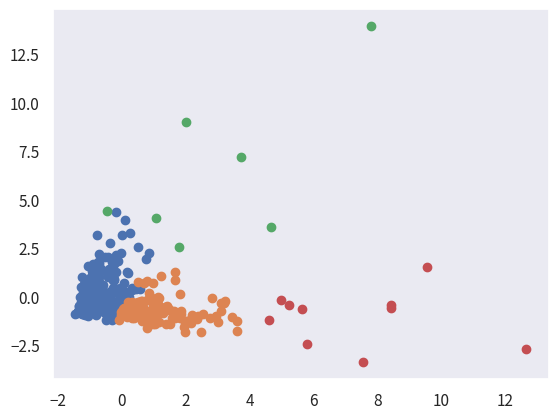

In [206]:
# 顧客（取引）データ
# 外れ値を除去したデータで再度クラスタリングを実施
cross(wholesale_drop, 4)

## 積み上げ棒グラフ

[Text(0, 0, 'クラスター1'),
 Text(1, 0, 'クラスター2'),
 Text(2, 0, 'クラスター3'),
 Text(3, 0, 'クラスター4')]

<Figure size 2000x500 with 0 Axes>

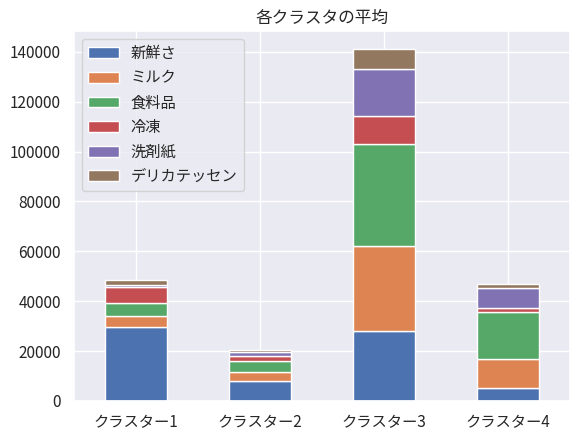

In [276]:
def clustering_pred(df):
    sc = StandardScaler()
    data_norm = sc.fit_transform(df)
    

    cls = KMeans(n_clusters = 4, n_init='auto',random_state=0)
    pred = cls.fit_predict(data_norm)
    
    #各データのラベルを結合
    df['クラスターID'] = pred

    return df

result = clustering_pred(wholesale_drop)

#積み上げグラフ
cluster = pd.DataFrame()
for i in range(4):
    cluster['クラスター' + str(i+1)] = wholesale_drop[wholesale_drop['クラスターID'] == i].mean()
cluster = cluster.drop('クラスターID')

plt.figure(figsize=[20,5])
sns.set()
rcParams['font.family'] = 'Noto Sans JP'
my_plot = cluster.T.plot(kind='bar', stacked=True, title='各クラスタの平均')
my_plot.set_xticklabels(my_plot.xaxis.get_majorticklabels(), rotation=0)


In [277]:
cluster

,クラスター1,クラスター2,クラスター3,クラスター4
新鮮さ,29772.000000,8101.462366,27972.230769,5123.098592
ミルク,4183.272727,3398.240143,34152.076923,11776.887324
食料品,5092.896104,4459.688172,40958.923077,18728.028169
冷凍,6589.779221,2133.763441,11325.538462,1432.183099
洗剤紙,819.272727,1329.458781,18600.615385,8338.676056
デリカテッセン,2133.103896,1038.637993,8208.692308,1552.126761


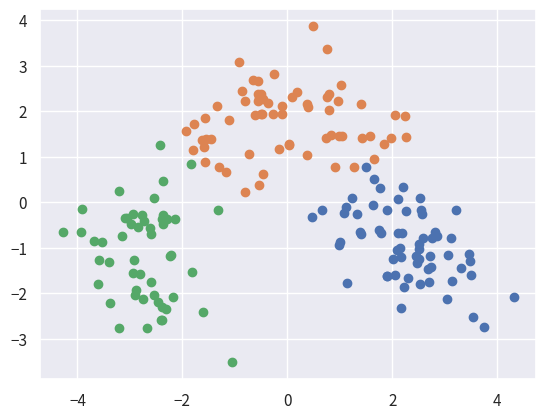

In [280]:
## K-Means++法 +　主成分分析

def cross(df, num):
    sc = StandardScaler()
    
    df_cls = df.copy()
    clustering_sc = sc.fit_transform(df_cls)
    
    kmeans = KMeans(n_clusters=num,
                   init='k-means++',
                   n_init=10,
                   max_iter=10000,
                   tol=1e-04, # 許容する誤差
                   random_state=42
                   )
    clusters = kmeans.fit(clustering_sc)
    df_cls['cluster'] = clusters.labels_
    
    x = clustering_sc
    pca = PCA(n_components=num)
    x_pca = pca.fit_transform(x)
    pca_df = pd.DataFrame(x_pca)
    pca_df['cluster'] = df_cls['cluster']
    
    for i in df_cls['cluster'].unique():
        tmp = pca_df.loc[pca_df['cluster']==i]
        plt.scatter(tmp[0], tmp[1])
    plt.show()

# ワインデータ
cross(wine_df, 3)


##　特徴量生成

In [330]:
#重心からの距離
num_cluster = 3
clusters = KMeans(n_clusters=num_cluster, random_state=42, n_init=10)
clusters.fit(wine_data)
#各クラスターのセンター位置を返す
centers = clusters.cluster_centers_

columns = wine_data.columns
clust_features = pd.DataFrame(index = wine_data.index)
for i in range(len(centers)):
    
    #各データポイントとセンター位置(3つ)の偏差 -> 絶対値　 -> データ毎の合計(データポイントの位置情報の合計)
    #マンハッタン距離
    # clust_features['クラスタ' + str(i + 1) + 'との距離'] = (wine_data[columns] - centers[i]).applymap(abs).apply(sum, axis = 1) 
    
    """
    applymap()はデータフレームの各要素に適応
    apply()は各列、行に適応
    
    ↓普通はユークリッド距離で計算するとchatGPTに言われたので、実装してみた
    """
    #ユークリッド距離での計算(自作)
    dv_df = np.sqrt((wine_data - centers[i])**2).apply(sum, axis=1)
    

dv_df

0       655.342754
1       613.783623
2       744.822754
3      1058.195072
4       306.797971
          ...     
173     295.979855
174     311.833478
175     416.896957
176     419.146087
177     120.393478
Length: 178, dtype: float64

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.300161,-0.794032,0.021935,-4.290323,23.403226,0.688871,1.475968,-0.108387,0.786613,-0.010323,0.156032,1.554516,336.66129
1,0.270161,-0.724032,-0.268065,-8.690323,-3.596774,0.538871,1.175968,-0.128387,-0.223387,-1.270323,0.166032,1.034516,321.66129
2,0.230161,-0.144032,0.261935,-1.290323,-2.596774,0.688871,1.655968,-0.088387,1.306613,0.029677,0.146032,0.804516,456.66129
3,1.440161,-0.554032,0.091935,-3.090323,9.403226,1.738871,1.905968,-0.148387,0.676613,2.149677,-0.023968,1.084516,751.66129
4,0.310161,0.085968,0.461935,1.109677,14.403226,0.688871,1.105968,0.001613,0.316613,-1.330323,0.156032,0.564516,6.66129
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.780161,3.145968,0.041935,0.609677,-8.596774,-0.431129,-0.974032,0.131613,-0.443387,2.049677,-0.243968,-0.625484,11.66129
174,0.470161,1.405968,0.071935,3.109677,-1.596774,-0.311129,-0.834032,0.041613,-0.093387,1.649677,-0.183968,-0.805484,21.66129
175,0.340161,1.775968,-0.148065,0.109677,16.403226,-0.521129,-0.894032,0.041613,-0.153387,4.549677,-0.293968,-0.805484,106.66129
176,0.240161,0.085968,-0.038065,0.109677,16.403226,-0.461129,-0.904032,0.141613,-0.043387,3.649677,-0.283968,-0.745484,111.66129
